## Case 4 - Data en machine learning analysis

### Importing libraries & loading dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
import scipy
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
# Load dataset
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train_Acitivity_Tracker_Labeled.csv')


## Exploring dataset

In [3]:
print('Shape of test:', test.shape)
print('Shape of train:', train.shape)

Shape of test: (70398, 6)
Shape of train: (745216, 8)


In [4]:
# Label distribution
print('Label Distribution')
print(train['labels'].value_counts())

print('--------------------------------')
# Null values
print('null value counts')
train.isnull().sum()

Label Distribution
5     126443
6     124417
4     115867
1     111970
2     106389
3      98087
11     13592
9      11225
10     10337
12     10070
7       9499
8       7320
Name: labels, dtype: int64
--------------------------------
null value counts


Unnamed: 0    0
0             0
1             0
2             0
user          0
experiment    0
index         0
labels        0
dtype: int64

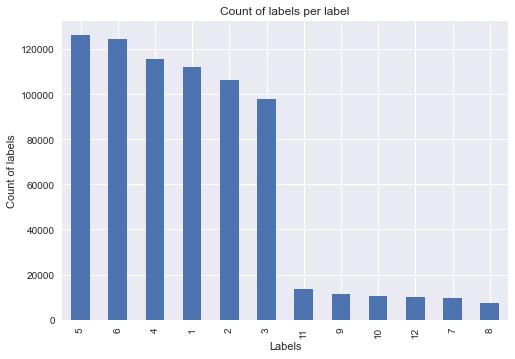

In [5]:
train['labels'].value_counts().plot(kind='bar');
plt.xlabel("Labels")
plt.ylabel('Count of labels')
plt.title('Count of labels per label')
plt.show()

In [6]:
# Features
train[['0','1','2']].describe()


,0,1,2
count,745216.000000,745216.000000,745216.000000
mean,0.806653,0.029731,0.082371
std,0.407770,0.407787,0.346554
min,-0.647222,-1.698611,-1.837500
25%,0.673611,-0.227778,-0.127778
50%,0.948611,-0.075000,0.041667
75%,1.019445,0.219444,0.230556
max,2.004167,1.676389,1.502778


In [7]:
# Creating new features
train['mean'] = (train['0'] + train['1'] + train['2']).mean()
train['std'] = np.std(train['0'] + train['1'] + train['2'])
train['sqrd'] = (train['0'] + train['1'] + train['2']) ** 2
train['cumsum'] = (train['0'] + train['1'] + train['2']).cumsum()

train[['0','1','2','mean','std','sqrd','cumsum']].describe()


,0,1,2,mean,std,sqrd,cumsum
count,745216.000000,745216.000000,745216.000000,7.452160e+05,7.452160e+05,745216.000000,745216.000000
mean,0.806653,0.029731,0.082371,9.187554e-01,4.631253e-01,1.058597,338940.495005
std,0.407770,0.407787,0.346554,1.779422e-11,5.755122e-12,0.816455,194997.182776
min,-0.647222,-1.698611,-1.837500,9.187554e-01,4.631253e-01,0.000000,1.001389
25%,0.673611,-0.227778,-0.127778,9.187554e-01,4.631253e-01,0.375156,175280.819687
50%,0.948611,-0.075000,0.041667,9.187554e-01,4.631253e-01,0.858196,335744.231117
75%,1.019445,0.219444,0.230556,9.187554e-01,4.631253e-01,1.664817,499962.219379
max,2.004167,1.676389,1.502778,9.187554e-01,4.631253e-01,8.385851,684671.215726


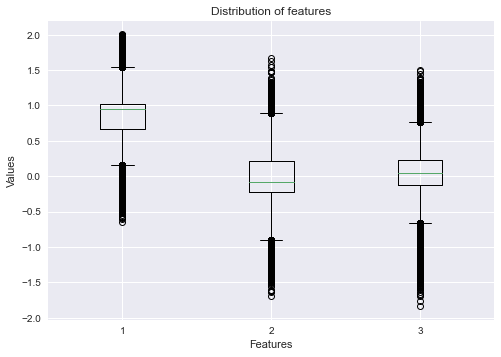

In [8]:
fig, ax = plt.subplots()

ax.boxplot(train[['0','1','2']])
ax.set_xlabel("Features")
ax.set_ylabel("Values")
ax.set_title('Distribution of features')

plt.show()

### Dataset splitting

In [9]:
from sklearn.model_selection import train_test_split


# Select Features
X= train[['0','1','2','mean','std','sqrd','cumsum']]

# Select Target
y = train['labels']

# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=20)

# Show the Training and Testing Data
print('Shape of training features:', X_train.shape)
print('Shape of testing features:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training features: (596172, 7)
Shape of testing features: (149044, 7)
Shape of training label: (596172,)
Shape of training label: (149044,)


In [10]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average ='micro')
    rec = metrics.recall_score(y_test, y_pred, average ='micro')
    f1 = metrics.f1_score(y_test, y_pred, average ='micro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)



    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

In [11]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9153068892407611
Precision: 0.9153068892407611
Recall: 0.9153068892407611
F1 Score: 0.9153068892407611
Cohens Kappa Score: 0.9012461667557087
Confusion Matrix:
 [[20639   442   646    68   145     0    55    57    35    46    45    97]
 [  400 18756  2074    24   110     1    67    42    15    20    45    39]
 [  668  2136 16368    37    92     0    50    25    33    50    61    57]
 [   40    23    36 22758    39     0    47    59    35    59    23    32]
 [  120    92   108    41 24333     0    72    80     7    23    42    14]
 [    0     0     0     0     0 24762     0     0    80    55    79    55]
 [   59    89    71    81    89     0  1397    70    25    32    40    25]
 [   53    39    42    37    97     0    54  1043     7    25    24    12]
 [   25    16    35    38     6    99    21     7  1617    98   119   106]
 [   43    29    57    82    23    64    49    27    97  1449   123    91]
 [   55    69    60    31    78    64    33    33   151   122  1977    91]
 [

In [12]:
train_rf = train.sample(frac=0.60)
print(train_rf.info())
# Select Features
X_rf= train_rf[['0','1','2','mean','std','sqrd','cumsum']]

# Select Target
y_rf = train_rf['labels']




# Set Training and Testing Data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf , y_rf, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=20)


from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0, max_depth=20)
rf.fit(X_train_rf, y_train_rf)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test_rf, y_test_rf)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Confusion Matrix:\n', rf_eval['cm'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447130 entries, 687490 to 409720
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  447130 non-null  int64  
 1   0           447130 non-null  float64
 2   1           447130 non-null  float64
 3   2           447130 non-null  float64
 4   user        447130 non-null  int64  
 5   experiment  447130 non-null  int64  
 6   index       447130 non-null  int64  
 7   labels      447130 non-null  int64  
 8   mean        447130 non-null  float64
 9   std         447130 non-null  float64
 10  sqrd        447130 non-null  float64
 11  cumsum      447130 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 44.3 MB
None
Accuracy: 0.8089369981884463
Precision: 0.8089369981884463
Recall: 0.8089369981884463
F1 Score: 0.8089369981884463
Cohens Kappa Score: 0.7753820063320476
Confusion Matrix:
 [[10033  1799  1133   128   324     0     5     2     1     7     4

In [13]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.2706650385121172
Precision: 0.2706650385121172
Recall: 0.2706650385121172
F1 Score: 0.2706650385121172
Cohens Kappa Score: 0.127337949124526
Confusion Matrix:
 [[ 4631     0     0     0 17197   447     0     0     0     0     0     0]
 [ 3989     0     0     0 17543    61     0     0     0     0     0     0]
 [ 3604     0     0     0 15325   648     0     0     0     0     0     0]
 [ 3599     0     0     0 13907  5645     0     0     0     0     0     0]
 [ 4241     0     0     0 20688     3     0     0     0     0     0     0]
 [ 3776     0     0     0  6233 15022     0     0     0     0     0     0]
 [  387     0     0     0  1363   228     0     0     0     0     0     0]
 [  279     0     0     0  1040   114     0     0     0     0     0     0]
 [  416     0     0     0   895   876     0     0     0     0     0     0]
 [  449     0     0     0   873   812     0     0     0     0     0     0]
 [  622     0     0     0  1159   983     0     0     0     0     0     0]
 [ 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9882920479858297
Precision: 0.9882920479858297
Recall: 0.9882920479858297
F1 Score: 0.9882920479858297
Cohens Kappa Score: 0.9863525925816918
Confusion Matrix:
 [[22099     0     8   111     1    13     0     2    23     0     2    16]
 [    0 21521    72     0     0     0     0     0     0     0     0     0]
 [    7   162 19408     0     0     0     0     0     0     0     0     0]
 [  194     0     0 22686   151    51    16    34     6     6     2     5]
 [    3    33    14   145 24657    16    25    11     7     8    13     0]
 [   53     0     0   156    78 24693     0     4     9     7    12    19]
 [    0     0     0     6    32     0  1940     0     0     0     0     0]
 [    0     0     0    19    14     0     0  1400     0     0     0     0]
 [    9     0     0     4    30    20     0     0  2124     0     0     0]
 [    0     0     0     4     7    11     0     0     0  2112     0     0]
 [    7     0     0     9    14    17     0     0     0     0  2717     0]
 [

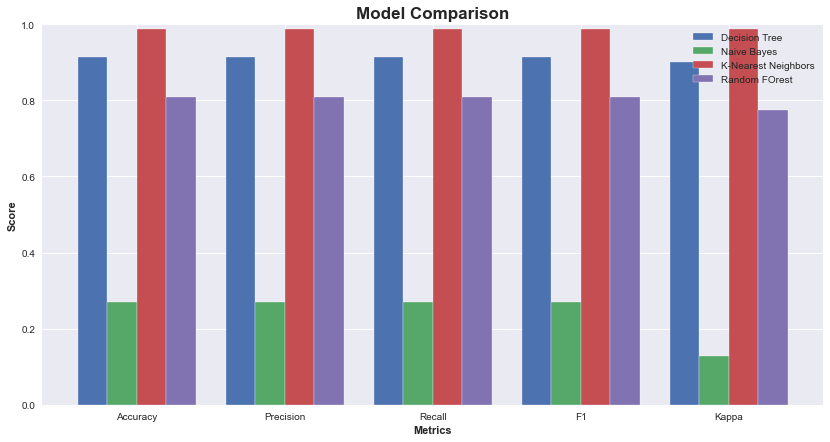

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax.bar(r2, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax.bar(r4, rf_score, width=barWidth, edgecolor='white', label='Random FOrest')


## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

## Create legend & title
ax.set_title('Model Comparison', fontsize=17, fontweight='bold')
ax.legend()

plt.show()

In [16]:
rf_new = RandomForestClassifier(random_state=0, max_depth=50)
rf_new.fit(X_train_rf, y_train_rf)

# Evaluate Model
rf_new_eval = evaluate_model(rf, X_test_rf, y_test_rf)

# Print result
print('Accuracy:', rf_new_eval['acc'])
print('Precision:', rf_new_eval['prec'])
print('Recall:', rf_new_eval['rec'])
print('F1 Score:', rf_new_eval['f1'])
print('Cohens Kappa Score:', rf_new_eval['kappa'])
print('Confusion Matrix:\n', rf_new_eval['cm'])

Accuracy: 0.8089369981884463
Precision: 0.8089369981884463
Recall: 0.8089369981884463
F1 Score: 0.8089369981884463
Cohens Kappa Score: 0.7753820063320476
Confusion Matrix:
 [[10033  1799  1133   128   324     0     5     2     1     7     4     1]
 [ 1650  9720  1103    61   247     0     2     2     3     6     3     0]
 [ 2312  2151  6919    97   215     0    10     2    14    10    13     5]
 [   70    11     8 13757    74     0     5     1     2     5     2     0]
 [  207   155    22    42 14518     0     4     2     1     0     1     2]
 [    0     0     0     0     0 15107     0     0     7     2    13     9]
 [  185   334    37   169   139     0   214     7     9    18    17     5]
 [  180   267    33   110   127     0     6   123     0     4     6     0]
 [   59    11    26   112    14   264     2     2   602    42   118    35]
 [  162    35    37   196    38   228     6     5    61   410   101    31]
 [  168   171    38    99    47   285    10     1    77    72   594    33]
 [

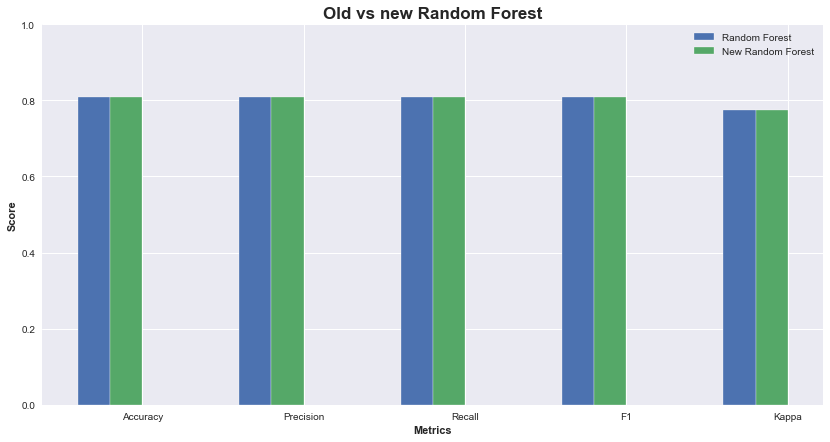

In [17]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
new_rf_score = [rf_new_eval['acc'], rf_new_eval['prec'], rf_new_eval['rec'], rf_new_eval['f1'], rf_new_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax.bar(r2, new_rf_score, width=barWidth, edgecolor='white', label='New Random Forest')

## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax.set_xticks([r + (barWidth * 1.5) for r in range(len(knn_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

## Create legend & title
ax.set_title('Old vs new Random Forest', fontsize=17, fontweight='bold')
ax.legend()

plt.show()

In [19]:
test['mean'] = (test['0'] + test['1'] + test['2']).mean()
test['std'] = np.std(test['0'] + test['1'] + test['2'])
test['sqrd'] = (test['0'] + test['1'] + test['2']) ** 2
test['cumsum'] = (test['0'] + test['1'] + test['2']).cumsum()

X_test_real = test[['0','1','2','mean','std','sqrd','cumsum']]
final_prediction = rf.predict(X_test_real)

Export = pd.DataFrame(test['Index'])
Export['labels'] = final_prediction
#Export.columns = ['Index','labels']
Export.to_csv('Kaggle.CSV',index=False)
print('Done')

Done
